# Resnet Pretrained Model using Pytorch

### Imports

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

### Load the pretrained model

In [ ]:
# Load the pretrained ResNet50 model
model = models.resnet50(pretrained=True)
model.eval()  # Set model to evaluation mode

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Image Processing

In [ ]:
# Define image preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 as required by ResNet50
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

### Loading Image for Prediction

In [ ]:
# Load and preprocess an image
img_path = "/content/Mamba_Dendroaspis_angusticeps.jpg"  # Replace with your image path
image_raw = Image.open(img_path)
image = transform(image_raw).unsqueeze(0)  # Add batch dimension

### Model inferencing

In [ ]:
# Perform inference
with torch.no_grad():
    outputs = model(image)

# Get the top-3 predictions
_, indices = torch.topk(outputs, k=3)
indices = indices.squeeze().tolist()

### Final Results

1: green mamba
2: green snake
3: vine snake


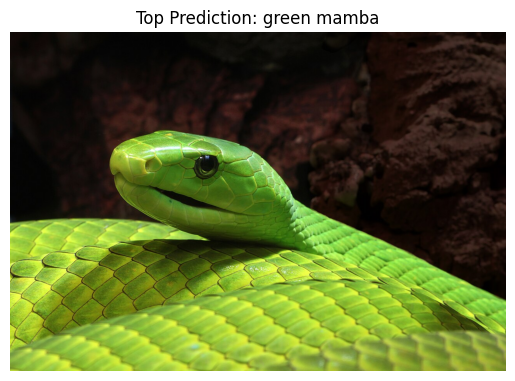

In [ ]:
# Load ImageNet labels
from torchvision.models import ResNet50_Weights
import matplotlib.pyplot as plt

labels = ResNet50_Weights.DEFAULT.meta["categories"]

# Print top predictions
predictions = [labels[idx] for idx in indices]
for i, label in enumerate(predictions):
    print(f"{i + 1}: {label}")

# Display the image
plt.imshow(image_raw)
plt.title(f"Top Prediction: {predictions[0]}")
plt.axis("off")
plt.show()